In [0]:
!git clone https://github.com/ysenarath/traffic-accident-prediction.git

Cloning into 'traffic-accident-prediction'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 29 (delta 6), reused 26 (delta 5), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [0]:
cd traffic-accident-prediction

/content/traffic-accident-prediction


In [0]:
!wget https://www.dropbox.com/s/1taputcfcmo195h/US_Accidents_Dec19.csv?dl=1 -O data/US_Accidents_Dec19.csv

--2020-04-07 14:58:49--  https://www.dropbox.com/s/1taputcfcmo195h/US_Accidents_Dec19.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/1taputcfcmo195h/US_Accidents_Dec19.csv [following]
--2020-04-07 14:58:49--  https://www.dropbox.com/s/dl/1taputcfcmo195h/US_Accidents_Dec19.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f869cd1dd0e9fbd087789b6a5.dl.dropboxusercontent.com/cd/0/get/A1Z9CFZjPPM27kBUvUBWppsUMOFgEcNwu8NNTnc0XpxtVhoPlunsLIcl7Xdxmy09IoQRoO3mpjiW6kQEoEnzjd5_b8Ky3dE8KGn744UeRTruBTlbBVR-RGY3Z_TYOCsV3j4/file?dl=1# [following]
--2020-04-07 14:58:50--  https://uc9f869cd1dd0e9fbd087789b6a5.dl.dropboxusercontent.com/cd/0/get/A1Z9CFZjPPM27kBUvUBWppsUMOFgEcNwu8NNTnc0XpxtVhoPlunsLIcl7Xdxmy09IoQRoO3mpjiW6kQEoE

In [0]:
from src.dataset import load_dataset

In [0]:
cd notebooks

/content/traffic-accident-prediction/notebooks


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.ticker as ticker


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = load_dataset()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [0]:
df_st_ct = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_st_ct.index,
    z = df_st_ct.values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale='solar_r',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = '',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [0]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

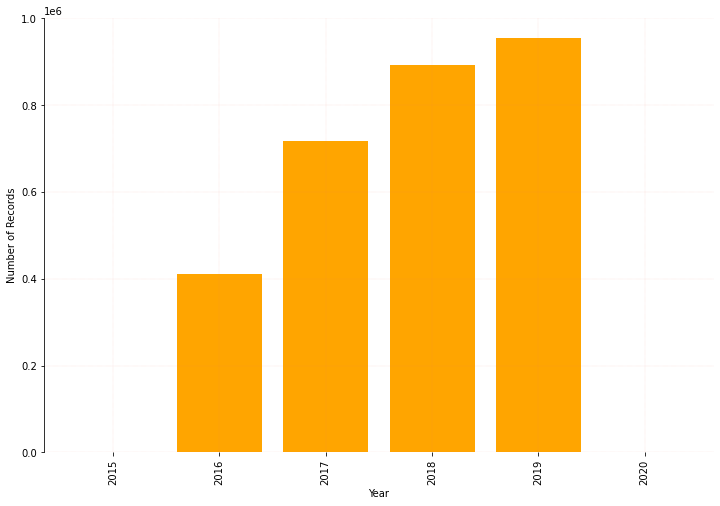

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Year').size().plot(kind = 'bar', 
                                 linewidth = 0.8,
                               color='orange',
                                 width = 0.8,
                                 align = 'center')
plt.ylabel('Number of Records')
ax.grid(linestyle=':', linewidth = '0.2', color ='salmon')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);

In [0]:
df = df[df['Year'] == 2019]

In [0]:
start = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
laps=end-start

In [0]:
laps.astype('timedelta64[m]')[:5]

512224    74.0
512225    44.0
512226    75.0
512227    70.0
512228    91.0
dtype: float64

In [0]:
laps.astype('timedelta64[m]').value_counts().nlargest(15)

29.0     217889
59.0      87823
44.0      69164
74.0      35308
28.0      35267
240.0     31826
89.0      22797
60.0      18825
45.0      16768
75.0      15342
27.0      14247
61.0      12499
76.0      11785
104.0      9864
32.0       8875
dtype: int64

Top 15 longest accidents correspond to 83.0% of the data


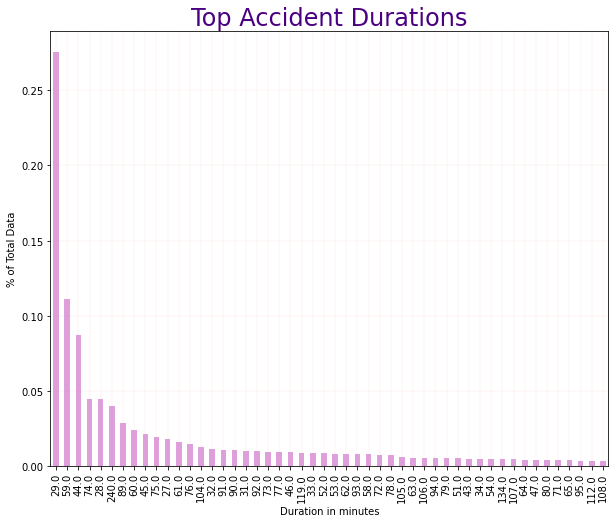

In [0]:
top_15 = laps.astype('timedelta64[m]').value_counts().nlargest(50) #Return the first n rows ordered by columns in descending order.
print('Top 15 longest accidents correspond to {:.1f}% of the data'.format(top_15.sum()*100/len(laps)))
(top_15/top_15.sum()).plot.bar(figsize=(10,8), color = 'plum')
plt.title('Top Accident Durations', fontsize = 24, color='indigo')
plt.xlabel('Duration in minutes')
plt.ylabel('% of Total Data')
plt.grid(linestyle=':', linewidth = '0.2', color ='salmon');

In [0]:
# Remove Outliers
x = laps.astype('timedelta64[m]')

df = df[x.between(x.quantile(.15), x.quantile(.85))]

In [0]:
df.shape

(757324, 55)

In [0]:
x.describe().T

count    953630.000000
mean         83.470823
std        1009.822062
min         -35.000000
25%          29.000000
50%          59.000000
75%          89.000000
max      422640.000000
dtype: float64

Text(0, 0.5, 'Duration in minutes')

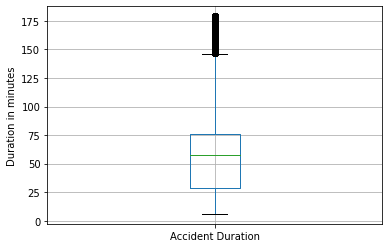

In [0]:
x2 = x[x.between(0, 179)]

pd.DataFrame(x2, columns=['Accident Duration']).plot.box(grid='True')
plt.ylabel('Duration in minutes')

In [0]:
x2.min()

6.0

In [0]:
x2.max()

179.0

Text(0, 0.5, 'Total Number of Accident Reports')

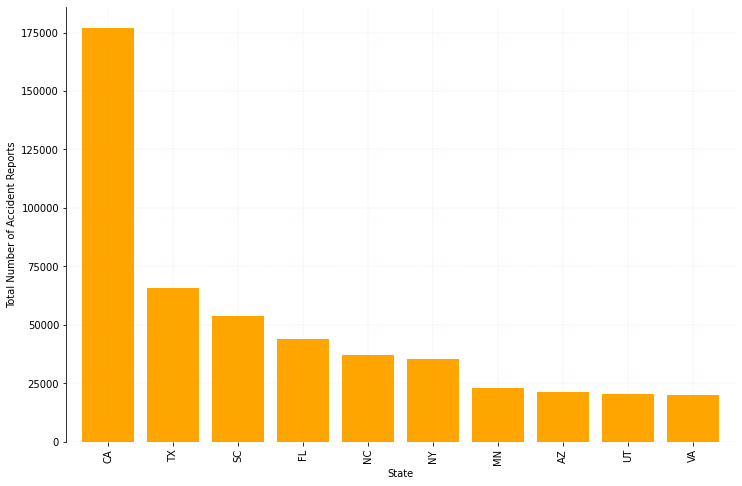

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
#fig.set_facecolor('lightgrey') #changes color around the plot area
#fig.set_axis_bgcolor('lightgrey')
df.groupby('State').size().sort_values(ascending=False)[:10].plot(kind = 'bar', 
                                 color= 'orange',
                                 width = 0.8,
                                 align = 'center')
ax.grid(linestyle=':', linewidth = '0.2', color ='salmon')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylabel('Total Number of Accident Reports')

([<matplotlib.patches.Wedge at 0x7fa4785aa710>,
 [Text(1.3999995787717325, 0.0010860197841681366, 'Severity 1'),
  Text(-0.714028740638039, 0.8367574066256338, 'Severity 2'),
  Text(0.6616203923639589, -0.8787823714709809, 'Severity 3'),
  Text(1.2976369641793444, -0.07834736240241283, 'Severity 4')],
 [Text(0.8999997292103994, 0.0006981555755366591, '0.0%'),
  Text(-0.38947022216620303, 0.4564131308867093, '72.4%'),
  Text(0.36088385038034115, -0.47933583898417137, '25.6%'),
  Text(0.7985458241103658, -0.04821376147840789, '1.9%')])

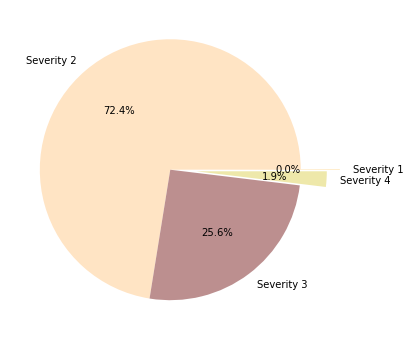

In [0]:
df_sev = df.groupby('Severity').size()
df_sev = df_sev[[1, 2,3,4]]
cols = ['orange','bisque', 'rosybrown', 'palegoldenrod']
cases = ['Severity 1','Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(df_sev,
        colors = cols,
        labels= cases,
        explode = (0.3, 0, 0.0, 0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %

In [0]:
df.to_csv('processed_dataset.csv')